<h2>WHO-Covid-19-global-table-data: Assignment 3 <h2>

<h2> Machine Learning: Regression Models</h2>

<h2>By Edison Nkurunungi - JAN22/COMP/959U</h2>

In [1]:
%pip install seaborn

     |████████████████████████████████| 292 kB 2.1 MB/s            
Note: you may need to restart the kernel to use updated packages.


<b>Import Libraries to be use</b>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline

In [3]:
# for test-train split and r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [4]:
# for linear regression:
from sklearn.linear_model import LinearRegression

In [5]:
# for cross validation and prediction
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

In [6]:
# for mean square error
from sklearn.metrics import mean_squared_error

In [7]:
# for saving trained models to disk:
import pickle

In [8]:
#import the file, WHO-COVID-19-global-data.csv and display dataset
df= pd.read_csv ('./Data/WHO-COVID-19-global-table-data.csv')
df.head()

,Name,WHO Region,Cases_cumulative total,Cases_cumulative total per 100000 population,Cases_newly reported in last 7 days,Cases_newly reported in last 7 days per 100000 population,Cases_newly reported in last 24 hours,Deaths_cumulative total,Deaths_cumulative total per 100000 population,Deaths_newly reported in last 7 days,Deaths_newly reported in last 7 days per 100000 population,Deaths_newly reported in last 24 hours
0,Global,NaN,503131834,6454.92628,4979698,63.887,404271,6200571,79.550181,16178,0.207556,1326
1,United States of America,Americas,79896146,24137.61500,241491,72.957,14564,981415,296.498000,2920,0.882000,19
2,India,South-East Asia,43045527,3119.23100,8599,0.623,1247,521966,37.824000,256,0.019000,1
3,Brazil,Americas,30252618,14232.54700,100216,47.147,2541,661960,311.424000,702,0.330000,22
4,France,Europe,27001702,41515.94100,800664,1231.045,19810,140985,216.769000,727,1.118000,48


In [9]:
df.tail()

,Name,WHO Region,Cases_cumulative total,Cases_cumulative total per 100000 population,Cases_newly reported in last 7 days,Cases_newly reported in last 7 days per 100000 population,Cases_newly reported in last 24 hours,Deaths_cumulative total,Deaths_cumulative total per 100000 population,Deaths_newly reported in last 7 days,Deaths_newly reported in last 7 days per 100000 population,Deaths_newly reported in last 24 hours
233,Pitcairn Islands,Western Pacific,0,0.0,0,0.0,0,0,0.0,0,0.0,0
234,Saint Helena,Africa,0,0.0,0,0.0,0,0,0.0,0,0.0,0
235,Tokelau,Western Pacific,0,0.0,0,0.0,0,0,0.0,0,0.0,0
236,Turkmenistan,Europe,0,0.0,0,0.0,0,0,0.0,0,0.0,0
237,Tuvalu,Western Pacific,0,0.0,0,0.0,0,0,0.0,0,0.0,0


In [10]:
df.dtypes

Name                                                           object
WHO Region                                                     object
Cases_cumulative total                                          int64
Cases_cumulative total per 100000 population                  float64
Cases_newly reported in last 7 days                             int64
Cases_newly reported in last 7 days per 100000 population     float64
Cases_newly reported in last 24 hours                           int64
Deaths_cumulative total                                         int64
Deaths_cumulative total per 100000 population                 float64
Deaths_newly reported in last 7 days                            int64
Deaths_newly reported in last 7 days per 100000 population    float64
Deaths_newly reported in last 24 hours                          int64
dtype: object

<b>Understanding the Linear relationship between two variables</b>

<p>In order to start understand the (linear) relationship between an individual variable and the Deaths_cumulative total. We can do this by using "regplot", which plots the scatterplot plus the fitted regression line for the data.</p>

<b>Let's find the scatterplot of "Cases_cumulative total" and "Deaths_cumulative total"</b>

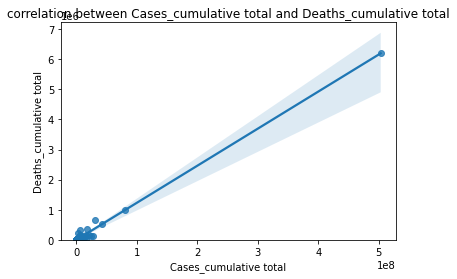

In [11]:
sns.regplot(x = 'Cases_cumulative total', y = 'Deaths_cumulative total', data = df)
plt.ylim(0,) # y axis starts from zero
plt.title("correlation between Cases_cumulative total and Deaths_cumulative total")
plt.show()

<p>There is a positive linear correlation between Cases_cumulative total and Deaths_cumulative total</p>

In [12]:
df[["Cases_cumulative total", "Deaths_cumulative total"]].corr()

,Cases_cumulative total,Deaths_cumulative total
Cases_cumulative total,1.000000,0.995412
Deaths_cumulative total,0.995412,1.000000


<p>As Cases_cumulative total goes up, the Deaths_cumulative total goes up: this indicates a positive direct correlation between these two variables. Cases_cumulative total seems like a pretty good predictor of Deaths_cumulative total since the regression line is almost a perfect diagonal line.We can examine the correlation between Cases_cumulative total and Deaths_cumulative total and see it's approximately 0.99</p>

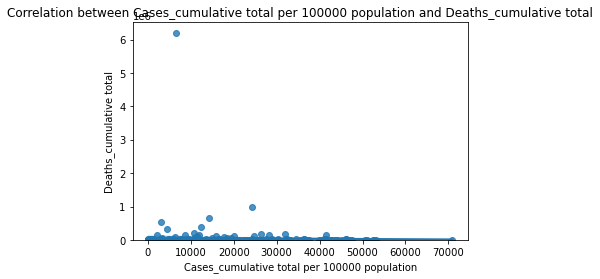

In [13]:
sns.regplot(x = 'Cases_cumulative total per 100000 population', y = 'Deaths_cumulative total', data = df)
plt.ylim(0,) # y axis starts from zero
plt.title("Correlation between Cases_cumulative total per 100000 population and Deaths_cumulative total")
plt.show()

In [14]:
df[["Cases_cumulative total per 100000 population", "Deaths_cumulative total"]].corr()

,Cases_cumulative total per 100000 population,Deaths_cumulative total
Cases_cumulative total per 100000 population,1.000000,-0.028697
Deaths_cumulative total,-0.028697,1.000000


<p>The above represents a Weak Linear Relationship: Cases_cumulative total per 100000 population does not seem like a good predictor of the Deaths_cumulative total at all since the regression line is horizontal. We can examine the correlation between Cases_cumulative total per 100000 population and Deaths_cumulative total and see it's approximately -0.028697</p>

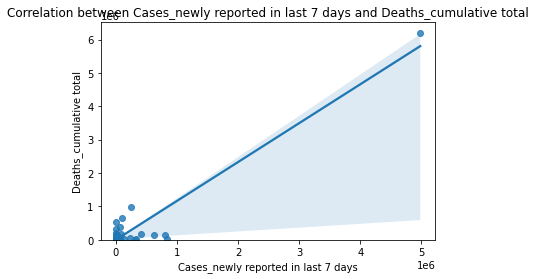

In [15]:
sns.regplot(x = 'Cases_newly reported in last 7 days', y = 'Deaths_cumulative total', data = df)
plt.ylim(0,) # y axis starts from zero
plt.title("Correlation between Cases_newly reported in last 7 days and Deaths_cumulative total")
plt.show()

In [16]:
df[["Cases_newly reported in last 7 days", "Deaths_cumulative total"]].corr()

,Cases_newly reported in last 7 days,Deaths_cumulative total
Cases_newly reported in last 7 days,1.00000,0.95026
Deaths_cumulative total,0.95026,1.00000


<p>As Cases_newly reported in last 7 days goes up, the Deaths_cumulative total goes up: this indicates a positive direct correlation between these two variables. Cases_newly reported in last 7 days seems like a pretty good predictor of Deaths_cumulative total since the regression line is almost a perfect diagonal line. We can examine the correlation between Cases_newly reported in last 7 days and Deaths_cumulative total and see it's approximately 0.95</p>

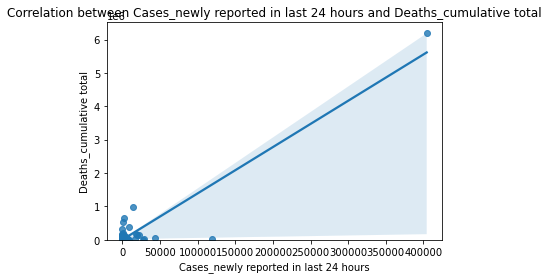

In [17]:
sns.regplot(x = 'Cases_newly reported in last 24 hours', y = 'Deaths_cumulative total', data = df)
plt.ylim(0,) # y axis starts from zero
plt.title("Correlation between Cases_newly reported in last 24 hours and Deaths_cumulative total")
plt.show()

In [18]:
df[["Cases_newly reported in last 24 hours", "Deaths_cumulative total"]].corr()

,Cases_newly reported in last 24 hours,Deaths_cumulative total
Cases_newly reported in last 24 hours,1.000000,0.931041
Deaths_cumulative total,0.931041,1.000000


<p>As Cases_newly reported in last 24 hours goes up, the Deaths_cumulative total goes up: this indicates a positive direct correlation between these two variables. Cases_newly reported in last 24 hours seems like a pretty good predictor of Deaths_cumulative total since the regression line is almost a perfect diagonal line. We can examine the correlation between Cases_newly reported in last 24 hours and Deaths_cumulative total and see it's approximately 0.93</p>

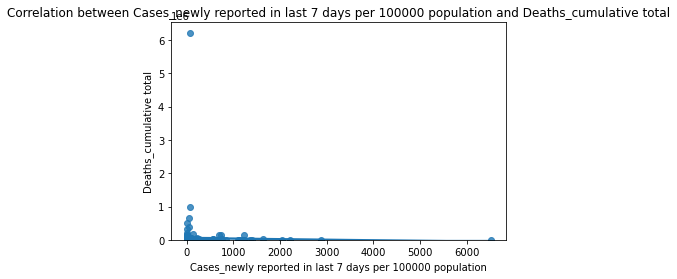

In [19]:
sns.regplot(x = 'Cases_newly reported in last 7 days per 100000 population', y = 'Deaths_cumulative total', data = df)
plt.ylim(0,) # y axis starts from zero
plt.title("Correlation between Cases_newly reported in last 7 days per 100000 population and Deaths_cumulative total")
plt.show()

In [20]:
df[["Cases_newly reported in last 7 days per 100000 population", "Deaths_cumulative total"]].corr()

,Cases_newly reported in last 7 days per 100000 population,Deaths_cumulative total
Cases_newly reported in last 7 days per 100000 population,1.000000,-0.022707
Deaths_cumulative total,-0.022707,1.000000


<p>The above represents a Weak Linear Relationship: Cases_newly reported in last 7 days per 100000 population does not seem like a good predictor of the Deaths_cumulative total at all since the regression line is horizontal. We can examine the correlation between Cases_newly reported in last 7 days per 100000 population and Deaths_cumulative total and see it's approximately -0.022707</p>

<b>Let us focus on Cases_cumulative total vs Deaths_cumulative total which demonstrates a stronger positive high correlation</b>

<b>Let us perform simple linear regression by writing our simple linear models</b>

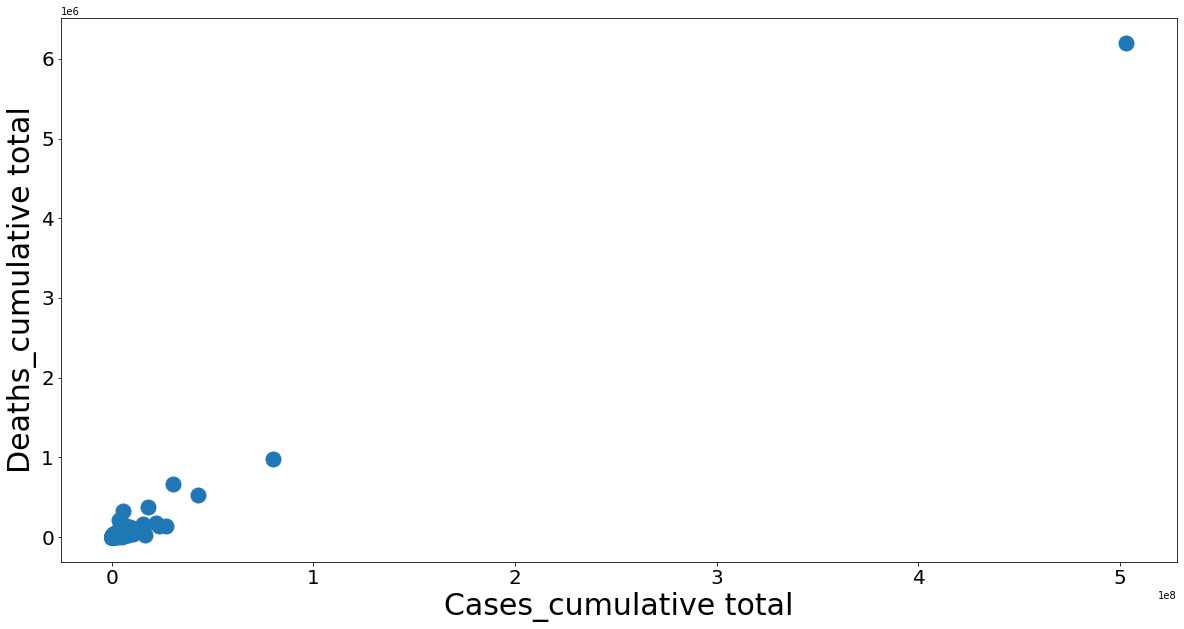

In [21]:
# dependent variable on y axis
y = df['Deaths_cumulative total']

# independent variable on x axis
x = df['Cases_cumulative total']


#Display the plot inline
%matplotlib inline

# Increase the size of the plot
plt.figure(figsize=(20,10))

# Create a scatter plot
plt.plot(x,y, 'o', markersize = 15)

# Add axis labels and increase the font size
plt.ylabel('Deaths_cumulative total', fontsize = 30)
plt.xlabel('Cases_cumulative total', fontsize = 30)

# Increase the font size on the ticks on the x and y axis
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# Display the scatter plot
plt.show()

<b>Determine the Slope and Y intercept</b>

<b>Create the linear regression object</b>

In [22]:
lm = LinearRegression()

<p>How could Cumulative_cases help us predict Cumulative_deaths: we create a linear function with "Cumulative_cases" as the predictor variable and the "Cumulative_deaths" as the response variable.</p>

In [23]:
X = df[['Cases_cumulative total']]
Y = df['Deaths_cumulative total']

<b>Fit the linear model using Cumulative_cases</b>

In [24]:
lm.fit(X,Y)

LinearRegression()

<b>Let us output a prediction</b>

In [25]:
Yhat=lm.predict(X)
Yhat[0:5] 

array([6192502.65933041,  983412.30310747,  529863.11173175,
        372410.84390708,  332399.29557921])

<p>The value of the intercept is:</p>

In [26]:
lm.intercept_

68.37576838638779

<p>The value of the slope is:</p>

In [27]:
lm.coef_

array([0.01230778])

<p>The final estimated linear model is:</p>

<h2>Model structure: Yhat = a + bX</h2>

<h2>Deaths_cumulative total = 68 + 0.01231*Cases_cumulative total</h2>

<b>Calculating R-squared Value</b>

In [28]:
#Cumulative_cases_fit
X = df[['Cases_cumulative total']]
Y = df['Deaths_cumulative total']
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.9908441278474144


<p>We can say that ~ 99.08441% of the variation of the Deaths_cumulative total is explained by this simple linear model Cases_cumulative total_fit.</p>

<b>To calculate the MSE: we compare the predicted results with the actual results</b>

In [29]:
Yhat=lm.predict(X)
mse = mean_squared_error(df['Deaths_cumulative total'], Yhat)
print('The mean square error of Cumulative_deaths and predicted value is: ', mse)

The mean square error of Cumulative_deaths and predicted value is:  1540012232.5846062


<h2>Multiple Linear Regression</h2>

<b>From the previous section we know that other good predictors of Deaths_cumulative total could be: Cases_newly reported in last 24 hours, Cases_newly reported in last 7 days, and Cases_cumulative total. Let's develop a model by including them as predictor variables</b>

<h2>Model format: Yhat = a + b1X1 + b2X2 + b3X3 + b4X4</h2>

In [31]:
lm3 = LinearRegression() # creating regression variable
Z = df[['Cases_newly reported in last 24 hours', 'Cases_newly reported in last 7 days', 'Cases_cumulative total']] # extracting multiple independent variables

#Fit the linear model using the two above-mentioned variables.
lm3.fit(Z, df['Deaths_cumulative total'])
print("What is the value of the intercept (a)? \n {}".format(lm3.intercept_))
print("What are the values of the coefficients (b1, b2, b3)? \n {}".format(lm3.coef_))
print("\n Final estimated linear model")
print(f"\n Deaths_cumulative total = {lm3.intercept_} + {lm3.coef_[0]}*Cases_newly reported in last 24 hours + {lm3.coef_[1]}*Cases_newly reported in last 7 days + {lm3.coef_[2]}*Cases_cumulative total")

What is the value of the intercept (a)? 
 199.38105942605762
What are the values of the coefficients (b1, b2, b3)? 
 [ 0.38832696 -0.2735967   0.01467266]

 Final estimated linear model

 Deaths_cumulative total = 199.38105942605762 + 0.3883269566845819*Cases_newly reported in last 24 hours + -0.2735967034671006*Cases_newly reported in last 7 days + 0.014672663872594832*Cases_cumulative total
